In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [25]:
df=pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


In [7]:
print("\nMissing Values in Each Column:")
print(df.isnull().sum())



Missing Values in Each Column:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [8]:
df.fillna(df.mean(numeric_only=True), inplace=True)


In [9]:
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})

In [10]:
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)


In [29]:
X = df.drop('price', axis=1)
y = df['price']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = model.predict(X_test)


In [21]:
comparison = pd.DataFrame({'Actual Price': y_test.values, 'Predicted Price': y_pred})
print("\nActual vs Predicted Prices:")
print(comparison.head())


Actual vs Predicted Prices:
   Actual Price  Predicted Price
0       4060000     5.164654e+06
1       6650000     7.224722e+06
2       3710000     3.109863e+06
3       6440000     4.612075e+06
4       2800000     3.294646e+06


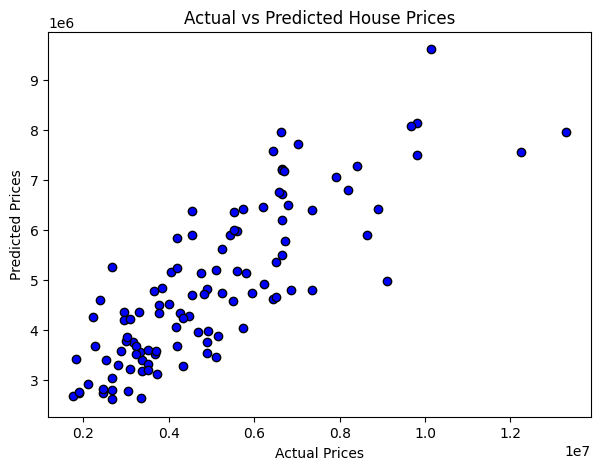

In [22]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, color='blue', edgecolors='black')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

In [24]:
print("\n📊 DATA CLEANING & MODEL SUMMARY")
print("-----------------------------------------")
print("✅ Converted categorical columns to numeric values")
print("✅ One-Hot encoded 'furnishingstatus'")
print("✅ Split dataset into 80% training and 20% testing")
print("✅ Trained Linear Regression Model successfully")
print("-----------------------------------------")
print("🎯 Prediction complete! Model is ready to use.")


📊 DATA CLEANING & MODEL SUMMARY
-----------------------------------------
✅ Converted categorical columns to numeric values
✅ One-Hot encoded 'furnishingstatus'
✅ Split dataset into 80% training and 20% testing
✅ Trained Linear Regression Model successfully
-----------------------------------------
🎯 Prediction complete! Model is ready to use.
